**PRINCIPAL COMPONENT ANALYSIS USING PYTHON (made up data)**

In [4]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(font="monospace", font_scale=1.25, style='white')

Imagine this example data: Animals compete in various challenges and scores are given from 1-10 (0 lowest; 10 highest) based on performance. Each column corresponds to a different animal and the rows represent the various challenges. The animal column names consist of species_animalname. In research we usually have column names that represent technical replicates of the same condition such as condx_1, condx_2, condx_3, we want to follow the same naming here to make connections between a simple example and more complex biological data. The scores can also be compared to read counts or signal intensities from genomics or proteomics experiments. 


In [5]:
# Create the dataset
data = {
    'Challenge': ['Obstacle course', 'Obedience training', 'Swimming', 'Balance', 'Jumping'],
    'Dog_Entropie': [2, 5, 5, 5, 10],
    'Dog_Oakley': [3, 4, 4, 6, 10],
    'Dog_Charlie': [1, 5, 3, 4, 10],
    'Cat_Baci': [5, 4, 2, 10, 8],
    'Cat_Sally': [4, 3, 2, 10, 8],
    'Cat_Fig': [3, 5, 2, 10, 8],
    'Rabbit_Chungus': [10, 3, 3, 4, 7]
}
df = pd.DataFrame(data)
df = df.set_index("Challenge")

df

,Dog_Entropie,Dog_Oakley,Dog_Charlie,Cat_Baci,Cat_Sally,Cat_Fig,Rabbit_Chungus
Challenge,,,,,,,
Obstacle course,2,3,1,5,4,3,10
Obedience training,5,4,5,4,3,5,3
Swimming,5,4,3,2,2,2,3
Balance,5,6,4,10,10,10,4
Jumping,10,10,10,8,8,8,7


We could plot the data in 1, 2 or 3 dimensions to understand if specific species show patterns for the various challenges, but we cannot really go beyond that because even a 3D plot is not easy to make conclusions from. For the purpose of showing 1,2,3 dimensional plots the data is transposed.

Data for 1D plot

In [6]:
df.T["Obstacle course"]

Dog_Entropie       2
Dog_Oakley         3
Dog_Charlie        1
Cat_Baci           5
Cat_Sally          4
Cat_Fig            3
Rabbit_Chungus    10
Name: Obstacle course, dtype: int64

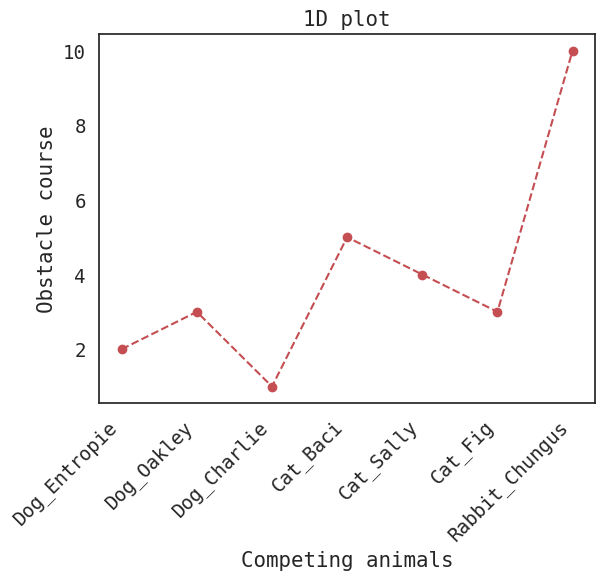

In [7]:
plt.plot(df.T["Obstacle course"], "--", color="r", marker="o")
plt.title("1D plot")
plt.xlabel("Competing animals")
plt.ylabel("Obstacle course")
plt.xticks(rotation = 45, ha='right') 
plt.show()

Data for 2D plot

In [8]:
df.head(2).T

Challenge,Obstacle course,Obedience training
Dog_Entropie,2,5
Dog_Oakley,3,4
Dog_Charlie,1,5
Cat_Baci,5,4
Cat_Sally,4,3
Cat_Fig,3,5
Rabbit_Chungus,10,3


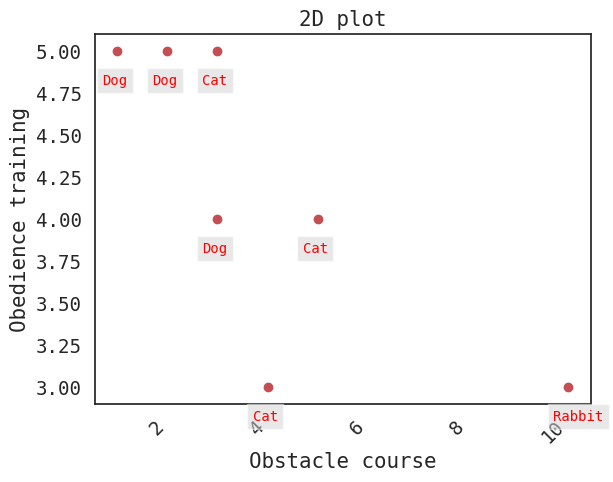

In [9]:
plt.scatter(df.T["Obstacle course"], df.T["Obedience training"], color='r')
plt.title("2D plot")
plt.xlabel("Obstacle course")
plt.ylabel("Obedience training")
plt.xticks(rotation = 45, ha='right') 

for i in range(df.head(2).T.shape[0]):
    plt.text(x=df.head(2).T["Obstacle course"][i]-0.3,y=df.head(2).T["Obedience training"][i]-0.2,s=df.head(2).T.index[i].split("_")[0],
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='lightgrey',alpha=0.5))
plt.show()

Data for 3D plot

In [10]:
df.head(3).T

Challenge,Obstacle course,Obedience training,Swimming
Dog_Entropie,2,5,5
Dog_Oakley,3,4,4
Dog_Charlie,1,5,3
Cat_Baci,5,4,2
Cat_Sally,4,3,2
Cat_Fig,3,5,2
Rabbit_Chungus,10,3,3


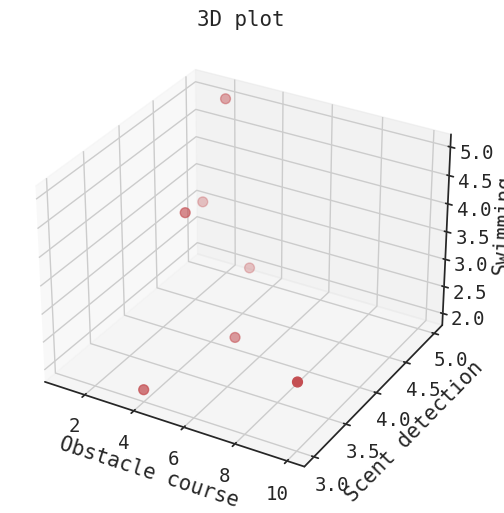

In [11]:
plt.figure(figsize=(7,6))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.head(3).T["Obstacle course"], df.head(3).T["Obedience training"], df.head(3).T["Swimming"], color = "r", s=50)
plt.title("3D plot")
ax.set_xlabel("Obstacle course")
ax.set_ylabel("Scent detection")
ax.set_zlabel('Swimming')
plt.show()

To understand patterns in the data we will use Principal Component Analysis. We will work with the transposed dataframe for this purpose - because our goal is to understand which challenge is clustering specific animals together.

**1. Get matrix variables and samples**

In [12]:
df_T = df.T.reset_index()
df_T = df_T.rename(columns={"index":"Name"})
df_T

Challenge,Name,Obstacle course,Obedience training,Swimming,Balance,Jumping
0,Dog_Entropie,2,5,5,5,10
1,Dog_Oakley,3,4,4,6,10
2,Dog_Charlie,1,5,3,4,10
3,Cat_Baci,5,4,2,10,8
4,Cat_Sally,4,3,2,10,8
5,Cat_Fig,3,5,2,10,8
6,Rabbit_Chungus,10,3,3,4,7


In [13]:
# subset the variable columns
X = df_T.loc[:, ['Obstacle course', 'Obedience training', 'Swimming', 'Balance', 'Jumping']]
X

Challenge,Obstacle course,Obedience training,Swimming,Balance,Jumping
0,2,5,5,5,10
1,3,4,4,6,10
2,1,5,3,4,10
3,5,4,2,10,8
4,4,3,2,10,8
5,3,5,2,10,8
6,10,3,3,4,7


In [14]:
# subset the sample column
y = df_T.loc[:, "Name"]
y

0      Dog_Entropie
1        Dog_Oakley
2       Dog_Charlie
3          Cat_Baci
4         Cat_Sally
5           Cat_Fig
6    Rabbit_Chungus
Name: Name, dtype: object

**2. Normalize each column of X, so that each column will have μ = 0 and σ = 1**

In [15]:
X = StandardScaler().fit_transform(X)

**3. Compute Principal Components and create Dataframe with sample information**

We apply PCA with the number of components to we want to keep.

In [16]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X)

In [17]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['PC1','PC2','PC3','PC4', 'PC5'])
principal_components_df = pd.concat([principal_components_df, y], axis = 1)
principal_components_df["Species"] = principal_components_df["Name"].str.split("_").str[0]
principal_components_df["Name"] = principal_components_df["Name"].str.split("_").str[1]
principal_components_df

,PC1,PC2,PC3,PC4,PC5,Name,Species
0,2.454477,0.615142,0.055047,-0.678766,-0.133965,Entropie,Dog
1,1.225963,0.520523,0.769795,-0.007467,0.199329,Oakley,Dog
2,1.911479,-0.178015,-0.475883,0.919520,-0.014524,Charlie,Dog
3,-1.323174,-0.916055,-0.038671,-0.186059,0.227497,Baci,Cat
4,-1.699671,-0.687806,0.964745,0.249057,-0.203520,Sally,Cat
5,-0.445252,-1.677875,-0.767660,-0.318485,-0.054565,Fig,Cat
6,-2.123822,2.324086,-0.507372,0.022201,-0.020252,Chungus,Rabbit


**4. Plot explained variance**

To answer the question of how much variance does each principal compnent explain we plot a barplot

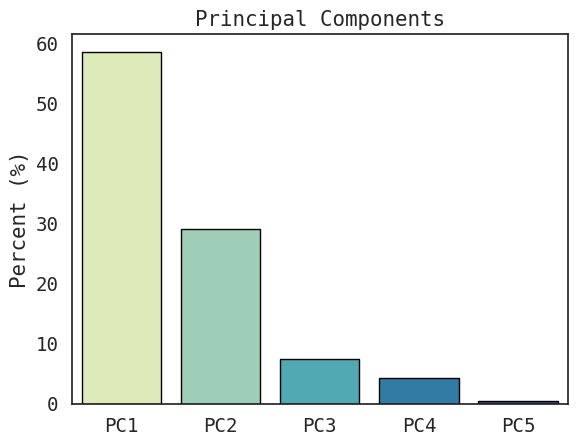

In [18]:
sns.barplot(x=['PC1','PC2','PC3','PC4', 'PC5'],
           y=(pca.explained_variance_ratio_)*100,
           edgecolor = 'black',
           palette = 'YlGnBu').set(title='Principal Components', ylabel='Percent (%)')
plt.show()

**5. Get PCA loadings dataframe**

To understand how each variable contributes to each prncipal component we obtain the loadings dataframe

In [19]:
# get PCA loadings dataframe
loadings_df = pd.DataFrame(data = np.transpose(pca.components_), columns = ['PC1','PC2','PC3','PC4', 'PC5'])    
X = df_T.loc[:, ['Obstacle course', 'Obedience training', 'Swimming', 'Balance', 'Jumping']]
loadings_df["variable"] = list(X.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,variable
0,-0.455551,0.484757,-0.249320,-0.274998,0.647843,Obstacle course
1,0.452847,-0.338283,-0.759640,-0.278403,0.161038,Obedience training
2,0.437551,0.461073,0.259465,-0.689664,-0.230222,Swimming
3,-0.289826,-0.660906,0.366122,-0.553620,0.196629,Balance
4,0.558527,-0.034498,0.399274,0.254433,0.680222,Jumping


**6. Plot PCA**

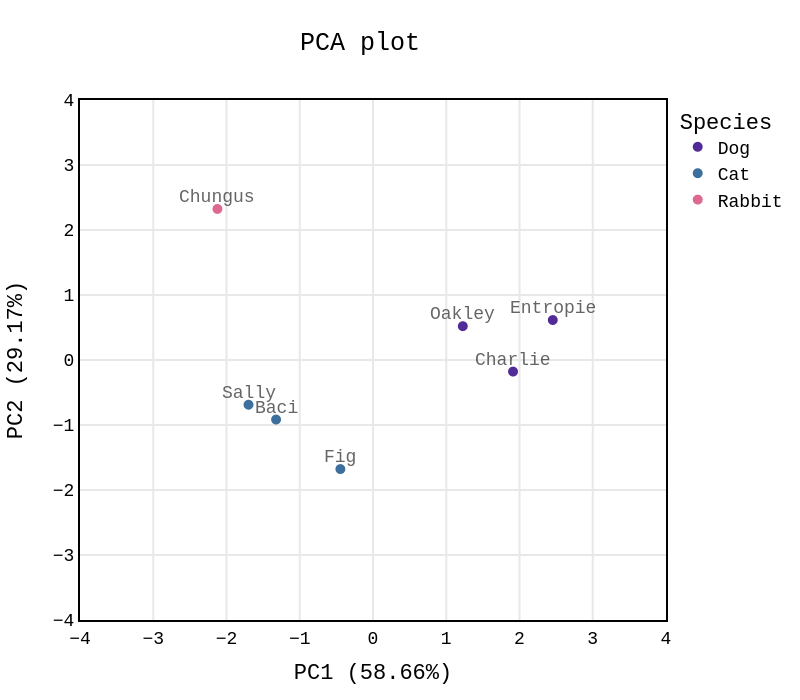

In [20]:
fig = px.scatter(principal_components_df, 
                 x='PC1', 
                 y='PC2', 
                 color=principal_components_df["Species"],
                 color_discrete_sequence=["#512C96", 
                                          "#3C6F9C", 
                                          "#DD6892"], 
                 labels={"PC1": "PC1 ({}%)".format(round((pca.explained_variance_ratio_[0] * 100),2)),
                         "PC2": "PC2 ({}%)".format(round((pca.explained_variance_ratio_[1] * 100),2)),
                         "species": "Species"},
                 title="PCA plot",
                 template="plotly_white")

#updates the range of x and y axis    
fig.update_xaxes(dtick=1, range=[-4, 4])
fig.update_yaxes(dtick=1, range=[-4, 4])

#determines if border of plot should be shown
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

#determines gridlines details
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')

#determines how zerolines should be displayed
fig.update_xaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')
fig.update_yaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')

#updates size of feature points in plot
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers')) 

#specifies layout details
fig.update_layout(height=700, 
                  width=800, 
                  showlegend=True, 
                  legend_title_text='Species',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="black"),
                  title_x=0.45)

## add text to outliers using their (x,y) coordinates:
n = principal_components_df.shape[0]
for i in range(n):
    fig.add_annotation(x= principal_components_df.iloc[i,0], 
                       y= principal_components_df.iloc[i,1], 
                       xref='x',
                       yref='y',
                       text=principal_components_df.iloc[i,5],
                       showarrow=False,
                       opacity=0.6,
                       yshift=12)

#fig.write_html("pca_plot_iris_data.html")
#fig.savefig("pca_plot_iris_data.png")
fig.show('png')

**7. Plot PCA with loadings**

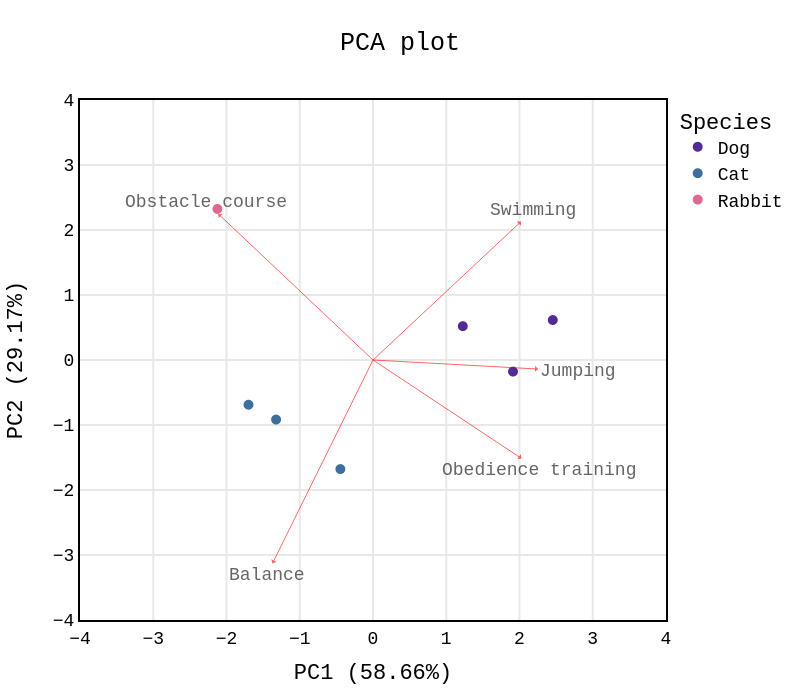

In [21]:
fig = px.scatter(principal_components_df, 
                 x='PC1', 
                 y='PC2', 
                 color=principal_components_df["Species"],
                 color_discrete_sequence=["#512C96", 
                                          "#3C6F9C", 
                                          "#DD6892"], 
                 labels={"PC1": "PC1 ({}%)".format(round((pca.explained_variance_ratio_[0] * 100),2)),
                         "PC2": "PC2 ({}%)".format(round((pca.explained_variance_ratio_[1] * 100),2)),
                         "species": "Species"},
                 title="PCA plot",
                 template="plotly_white")

#updates the range of x and y axis    
fig.update_xaxes(dtick=1, range=[-4, 4])
fig.update_yaxes(dtick=1, range=[-4, 4])

#determines if border of plot should be shown
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

#determines gridlines details
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')

#determines how zerolines should be displayed
fig.update_xaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')
fig.update_yaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')

#updates size of feature points in plot
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers')) 

#specifies layout details
fig.update_layout(height=700, 
                  width=800, 
                  showlegend=True, 
                  legend_title_text='Species',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="black"),
                  title_x=0.5)

#add loadings
n = loadings_df.shape[0]
for i in range(n):
    fig.add_annotation(x= 0, 
                       y= 0, 
                       ax=loadings_df.iloc[i,0] * 5,  
                       ay=loadings_df.iloc[i,1] * 5, 
                       xref='x',
                       yref='y',
                       axref='x',
                       ayref='y',
                       text=loadings_df.iloc[i,5],  
                       showarrow=True,
                       arrowhead=3,
                       arrowsize=1,
                       arrowwidth=1,
                       arrowcolor='red',
                       opacity=0.6,
                       arrowside='start')

#fig.write_html("pca_plot_iris_data.html")
fig.show('png')

**8. Plot loadings heatmap**

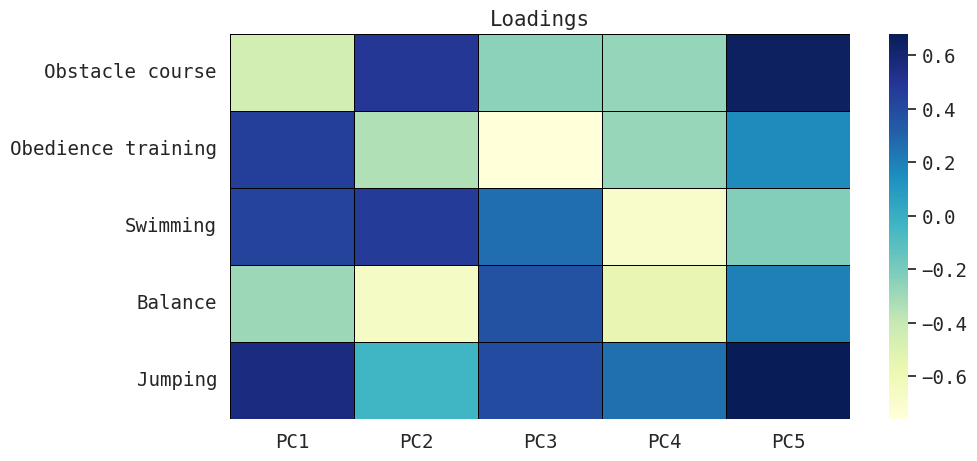

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(loadings_df.set_index("variable"),
           cmap='YlGnBu',
           linewidths=0.7,
           linecolor="black").set(title='Loadings', ylabel=None)
#plt.savefig("loadings_heatmap.png", bbox_inches='tight')
plt.show()
